In [13]:

import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [14]:
df_compas_aeq = pd.read_csv("https://raw.githubusercontent.com/dssg/aequitas/master/examples/data/compas_for_aequitas.csv")
df_compas_aeq.head()

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45


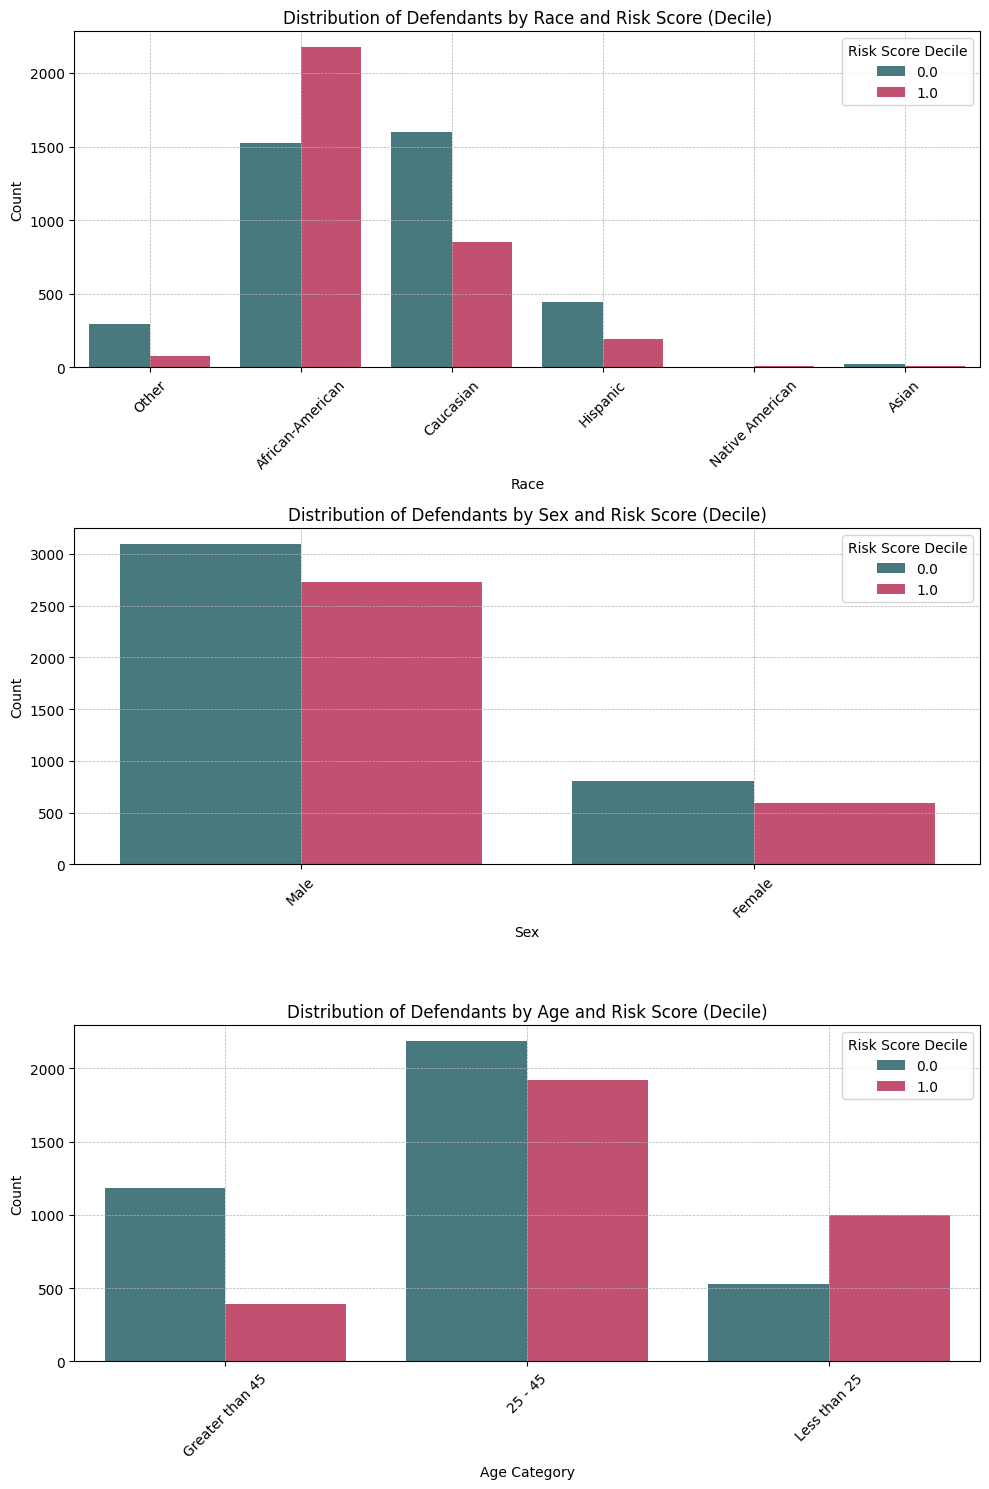

In [36]:

Reds_palette = sns.diverging_palette(204, 0, n=2)

# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# race
by_race = sns.countplot(
    ax=axes[0],
    x="race",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

#  race
axes[0].set_title("Distribution of Defendants by Race and Risk Score (Decile)")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Count")

#  race
axes[0].legend(loc='upper right', title='Risk Score Decile')

#  race
axes[0].grid(True, linestyle='--', linewidth=0.5)

#  race
axes[0].tick_params(axis='x', rotation=45)

# sex
by_sex = sns.countplot(
    ax=axes[1],
    x="sex",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

# Add title and labels 
axes[1].set_title("Distribution of Defendants by Sex and Risk Score (Decile)")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

# sex
axes[1].legend(loc='upper right', title='Risk Score Decile')

# sex
axes[1].grid(True, linestyle='--', linewidth=0.5)

# sex
axes[1].tick_params(axis='x', rotation=45)

# Create countplot for age
by_age = sns.countplot(
    ax=axes[2],
    x="age_cat",
    hue="score",
    data=df_compas_aeq,
    palette=Reds_palette
)

axes[2].set_title("Distribution of Defendants by Age and Risk Score (Decile)")
axes[2].set_xlabel("Age Category")
axes[2].set_ylabel("Count")

axes[2].legend(loc='upper right', title='Risk Score Decile')

axes[2].grid(True, linestyle='--', linewidth=0.5)

axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


In [40]:
coolwarm_two_colors = sns.color_palette("coolwarm", n_colors=2)


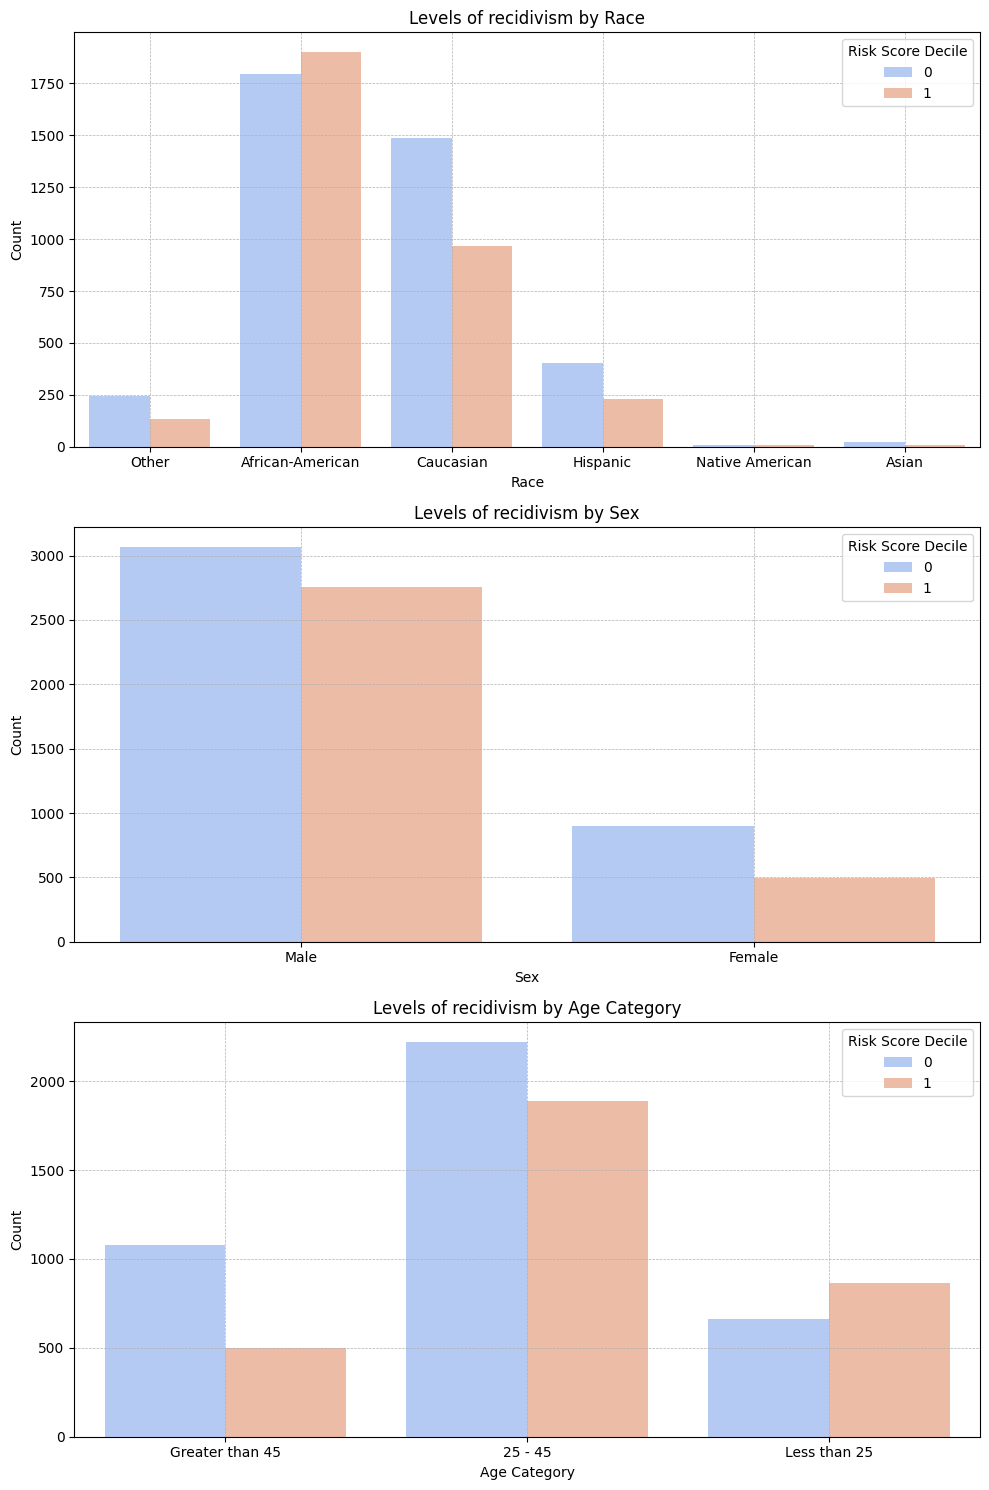

In [47]:
coolwarm_palette = sns.color_palette("coolwarm", as_cmap=True)


# Create a figure with 3 subplots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Create countplot for race
label_by_race = sns.countplot(
    ax=axes[0],
    x="race",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for race
axes[0].set_title("Levels of recidivism by Race")
axes[0].set_xlabel("Race")
axes[0].set_ylabel("Count")
axes[0].grid(True, linestyle='--', linewidth=0.5)
axes[0].legend(loc='upper right', title='Risk Score Decile')

# Create countplot for sex
label_by_sex = sns.countplot(
    ax=axes[1],
    x="sex",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for sex
axes[1].set_title("Levels of recidivism by Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")
axes[1].grid(True, linestyle='--', linewidth=0.5)
axes[1].legend(loc='upper right', title='Risk Score Decile')

# Create countplot for age category
label_by_age = sns.countplot(
    ax=axes[2],
    x="age_cat",
    hue="label_value",
    data=df_compas_aeq,
    palette=coolwarm_two_colors
)

# Add title and labels for age category
axes[2].set_title("Levels of recidivism by Age Category")
axes[2].set_xlabel("Age Category")
axes[2].set_ylabel("Count")
axes[2].grid(True, linestyle='--', linewidth=0.5)
axes[2].legend(loc='upper right', title='Risk Score Decile')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Aequitas Group()

## Evaluate biases across all subgroups in their dataset by assembling a confusion matrix of each subgroup, calculating commonly used metrics such as false positive rate and false omission rate, as well as counts by group and group prevelance among the sample population.

In [49]:
g = Group()
xtab, _ = g.get_crosstabs(df_compas_aeq)
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,...,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,...,0.250000,2,3,21,6,9,23,32,7214,0.281250
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,...,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,...,0.298273,87,129,318,103,232,405,637,7214,0.364207
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,...,0.666667,3,1,5,9,10,8,18,7214,0.555556
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,...,0.209549,36,90,208,43,133,244,377,7214,0.352785
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,...,0.423656,288,195,609,303,498,897,1395,7214,0.356989
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,...,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,...,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,...,0.250000,181,285,897,213,498,1078,1576,7214,0.315990


In [51]:
absolute_metrics = g.list_absolute_metrics(xtab)
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)


,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


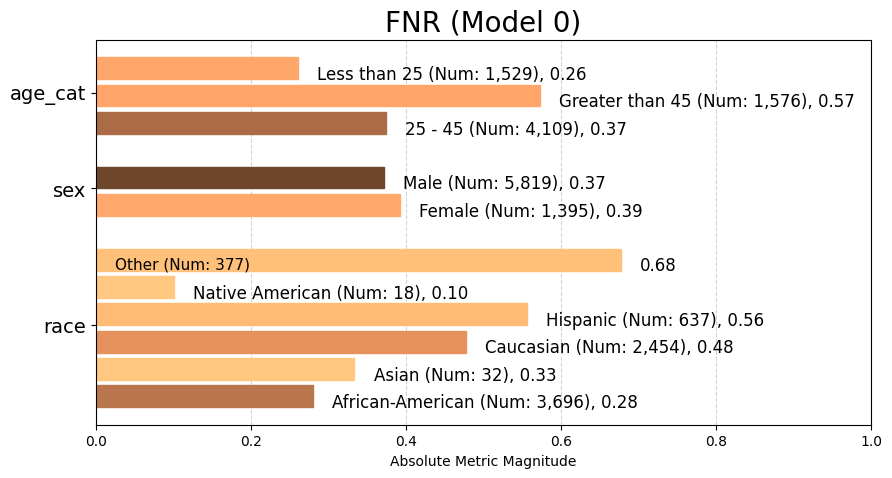

In [53]:
aqp = Plot()
fnr = aqp.plot_group_metric(xtab, 'fnr')

In [69]:
#convert xtab to dataframe

xtab_df = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2).set_index(['attribute_name', 'attribute_value'])

xtab_df = xtab_df.reset_index()

xtab_df

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


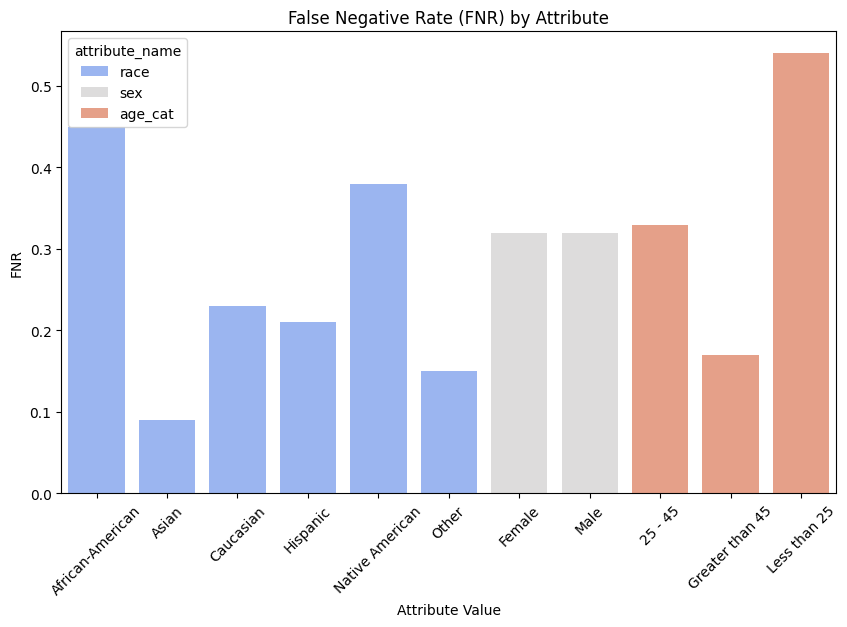

In [71]:

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot for FNR
sns.barplot(x='attribute_value', y='fpr', hue='attribute_name', data=xtab_df, palette='coolwarm')

# Add title and labels
plt.title('False Negative Rate (FNR) by Attribute')
plt.xlabel('Attribute Value')
plt.ylabel('FNR')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### These metrics are the Positive Predictive Rate (PPR), Predictive Prevalence (PPrev), False Negative Rate (FNR), and False Positive Rate (FPR). Fairness in machine learning is a measure of how unbiased a model's predictions are across different groups defined by attributes such as race, sex, and age categories.

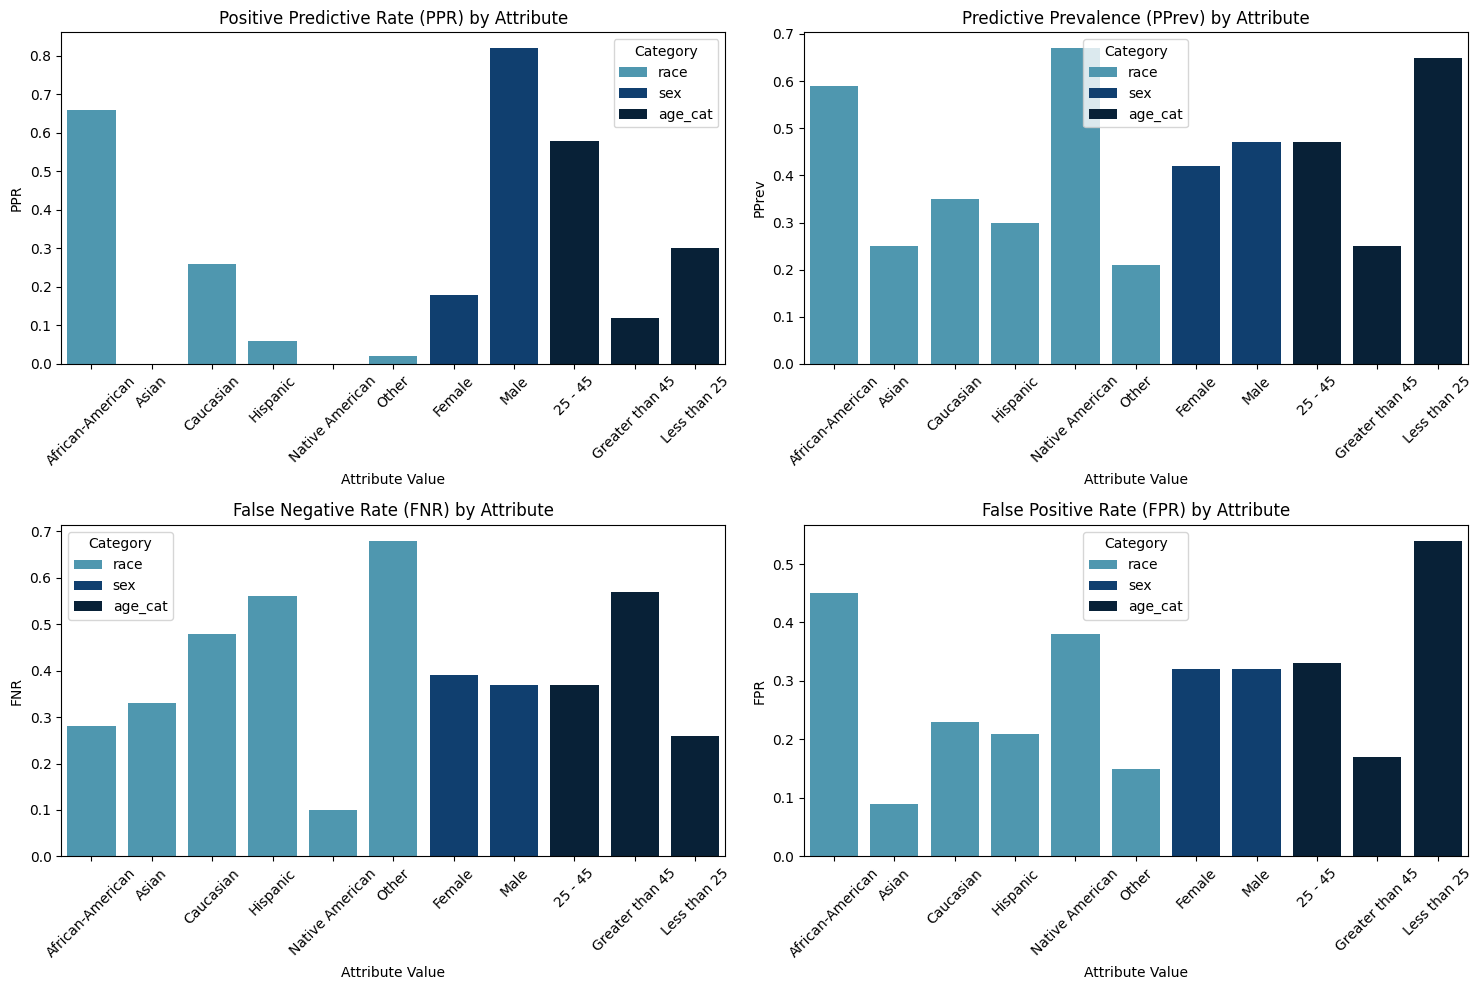

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data frame 'xtab_df' would need to be defined here with the appropriate data

# Define the figure size and the number of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

palette = sns.color_palette("ocean_r", n_colors=3)


# PPR Plot in the upper left position (0, 0)
sns.barplot(x='attribute_value', y='ppr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Positive Predictive Rate (PPR) by Attribute')
axes[0, 0].set_xlabel('Attribute Value')
axes[0, 0].set_ylabel('PPR')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(loc='upper right', title='Category')

# PPrev Plot in the upper right position (0, 1)
sns.barplot(x='attribute_value', y='pprev', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Predictive Prevalence (PPrev) by Attribute')
axes[0, 1].set_xlabel('Attribute Value')
axes[0, 1].set_ylabel('PPrev')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(loc='upper center', title='Category')

# FNR Plot in the bottom left position (1, 0)
sns.barplot(x='attribute_value', y='fnr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('False Negative Rate (FNR) by Attribute')
axes[1, 0].set_xlabel('Attribute Value')
axes[1, 0].set_ylabel('FNR')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(loc='upper left', title='Category')

# FPR Plot in the bottom right position (1, 1)
sns.barplot(x='attribute_value', y='fpr', hue='attribute_name', data=xtab_df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('False Positive Rate (FPR) by Attribute')
axes[1, 1].set_xlabel('Attribute Value')
axes[1, 1].set_ylabel('FPR')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(loc='upper center', title='Category')

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()



# How a ideal scenario would look like?

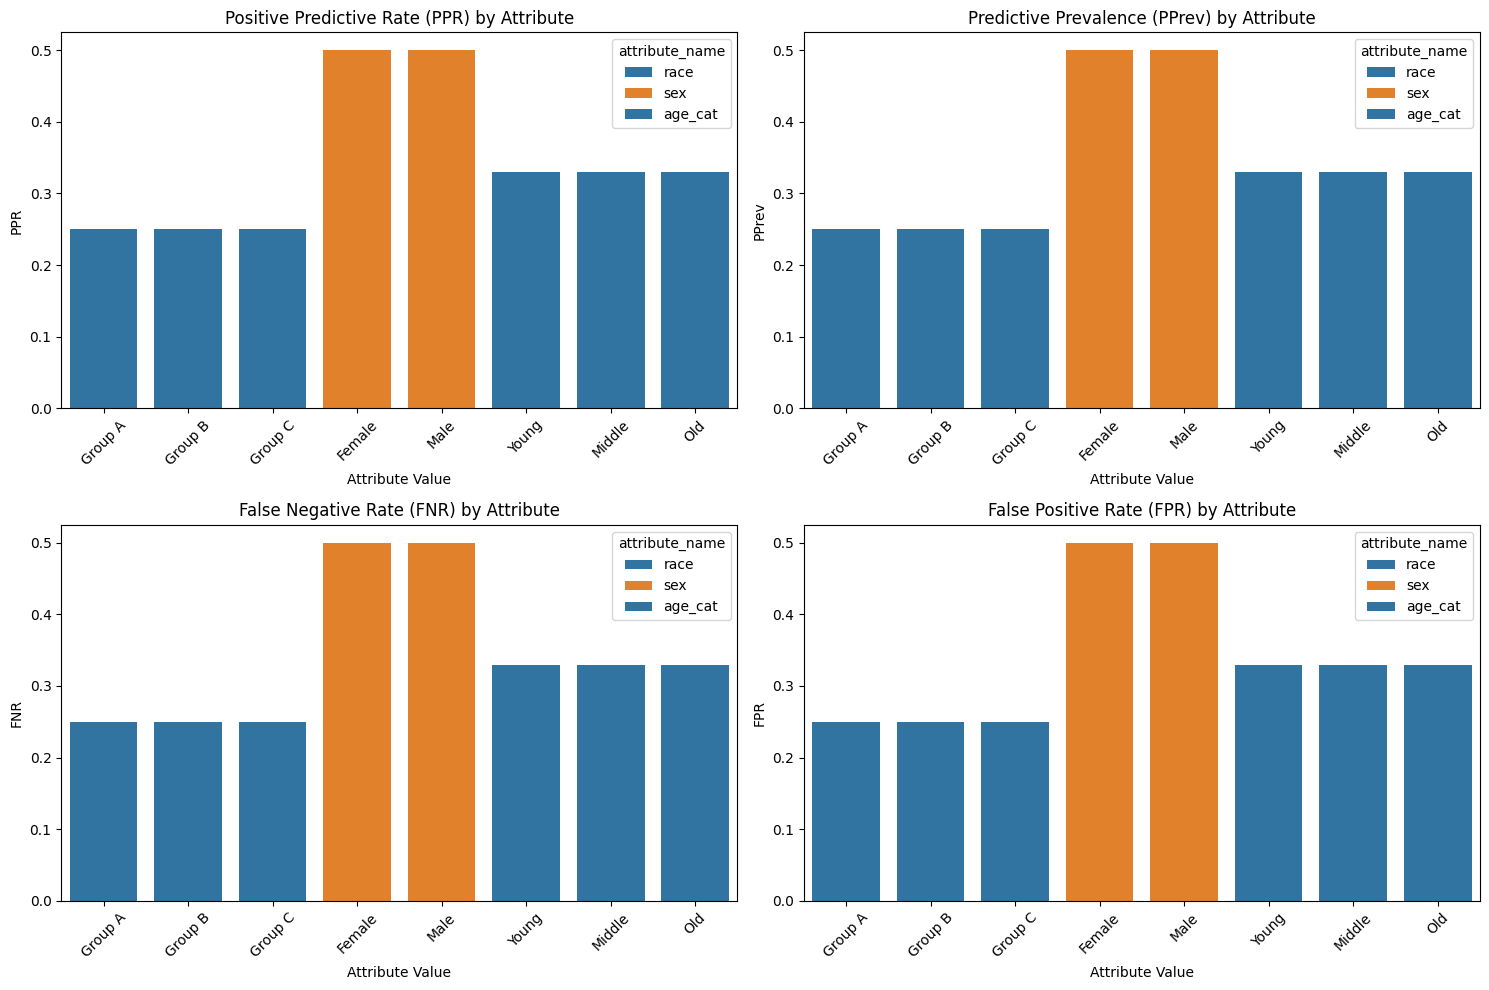

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a balanced example dataset
balanced_data = {
    'attribute_name': ['race', 'race', 'race', 'sex', 'sex', 'age_cat', 'age_cat', 'age_cat'],
    'attribute_value': ['Group A', 'Group B', 'Group C', 'Female', 'Male', 'Young', 'Middle', 'Old'],
    'ppr': [0.25, 0.25, 0.25, 0.5, 0.5, 0.33, 0.33, 0.33],
    'pprev': [0.25, 0.25, 0.25, 0.5, 0.5, 0.33, 0.33, 0.33],
    'fnr': [0.25, 0.25, 0.25, 0.5, 0.5, 0.33, 0.33, 0.33],
    'fpr': [0.25, 0.25, 0.25, 0.5, 0.5, 0.33, 0.33, 0.33],
}

df_balanced = pd.DataFrame(balanced_data)

# Define the figure size and the number of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Define a neutral palette
neutral_palette = sns.color_palette(['#1f77b4', '#ff7f0e'])

# PPR Plot
sns.barplot(x='attribute_value', y='ppr', hue='attribute_name', data=df_balanced, palette=neutral_palette, ax=axes[0, 0])
axes[0, 0].set_title('Positive Predictive Rate (PPR) by Attribute')
axes[0, 0].set_xlabel('Attribute Value')
axes[0, 0].set_ylabel('PPR')
axes[0, 0].tick_params(axis='x', rotation=45)

# PPrev Plot
sns.barplot(x='attribute_value', y='pprev', hue='attribute_name', data=df_balanced, palette=neutral_palette, ax=axes[0, 1])
axes[0, 1].set_title('Predictive Prevalence (PPrev) by Attribute')
axes[0, 1].set_xlabel('Attribute Value')
axes[0, 1].set_ylabel('PPrev')
axes[0, 1].tick_params(axis='x', rotation=45)

# FNR Plot
sns.barplot(x='attribute_value', y='fnr', hue='attribute_name', data=df_balanced, palette=neutral_palette, ax=axes[1, 0])
axes[1, 0].set_title('False Negative Rate (FNR) by Attribute')
axes[1, 0].set_xlabel('Attribute Value')
axes[1, 0].set_ylabel('FNR')
axes[1, 0].tick_params(axis='x', rotation=45)

# FPR Plot
sns.barplot(x='attribute_value', y='fpr', hue='attribute_name', data=df_balanced, palette=neutral_palette, ax=axes[1, 1])
axes[1, 1].set_title('False Positive Rate (FPR) by Attribute')
axes[1, 1].set_xlabel('Attribute Value')
axes[1, 1].set_ylabel('FPR')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()


# Levels of disparity exist between population


## Disparities are calculated as a ratio of a metric for a group of interest compared to a base group



$\text{Disparity}_{FNR} = \frac{FNR_{\text{black}}}{FNR_{\text{white}}}$



In [87]:
b = Bias()

# Caucasian as reference group

In [118]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df_compas_aeq, ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,1924,2185,0.580042,0.468240,741,706,1479,1183,1889,2220,4109,7214,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,394,1182,0.118782,0.250000,181,285,897,213,498,1078,1576,7214,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,25 - 45,25 - 45,25 - 45,25 

# Hispanics as reference group

In [119]:
hbdf = b.get_disparity_predefined_groups(xtab, original_df=df_compas_aeq,
                                         ref_groups_dict={'race':'Hispanic', 'sex':'Male', 'age_cat':'25 - 45'},
                                         alpha=0.05,
                                         mask_significance=False)

get_disparity_predefined_group()


In [121]:
hbdf[['attribute_name', 'attribute_value'] +  calculated_disparities]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,race,African-American,11.442105,1.972030,1.161610,0.808669,1.211197,2.087696,0.503301,1.622079,0.702423,0.914326
1,race,Asian,0.042105,0.838158,1.383495,0.545977,0.433140,0.404798,0.599483,1.501618,1.162838,1.229953
2,race,Caucasian,4.494737,1.166727,1.090812,0.892487,0.998387,1.091838,0.858266,1.177511,0.974874,1.000654
3,race,Hispanic,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,race,Native American,0.063158,2.235088,1.383495,0.545977,0.577519,1.745690,0.179845,2.027184,0.795991,1.171384
5,race,Other,0.415789,0.702541,1.004056,0.995199,1.046512,0.686829,1.216996,0.728228,1.085679,0.981132
6,sex,Female,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,age_cat,Greater than 45,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136


# Disparities calculated in relation to sample population majority group (in terms of group prevalence) for each attribute


### The COMPAS dataset predominantly consists of African American males aged 25-45. By employing the get_disparity_major_group() method, researchers can efficiently assess the comparative frequency of false or correct high- or medium-risk identifications in other groups relative to this major demographic.

In [122]:
majority_bdf = b.get_disparity_major_group(xtab, original_df=df_compas_aeq, mask_significance=True)


get_disparity_major_group()


In [123]:
majority_bdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,...,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American,African-American
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
8,0,binary 0/1,3317,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,...,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45
9,0,binary 0/1,3317,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,...,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45,25 - 45


# Visualize disparity

Reference groups, shown in grey with a disparity value of 1, form the basis of the treemap which displays precision disparity values using 'Caucasian' as the predefined group. The size and color of each section represent group sizes and disparity magnitudes, respectively. Disparities greater than 10 times or less than 0.1 times the size of the reference group are visualized as 10x and 0.1x, respectively. Asterisks highlight statistically significant disparities at the 5% level between the 'Caucasian' group and both the 'African-American' and 'Other' race groups.


The treemap illustrates precision disparity values against a 'Caucasian' reference group within the race attribute. Group sizes and disparity magnitudes are represented through the size and color of each section. Asterisks indicate statistically significant disparities between the 'Caucasian' group and both the 'African-American' and 'Other' race groups at the 5% level. The visualization scales groups from a minimum of 0.1 to a maximum of 10 times the size of the reference group.

# Caucasian as reference group

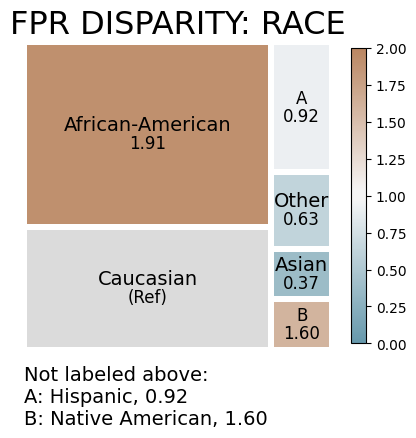

In [124]:
aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)


# Hispanics as reference group

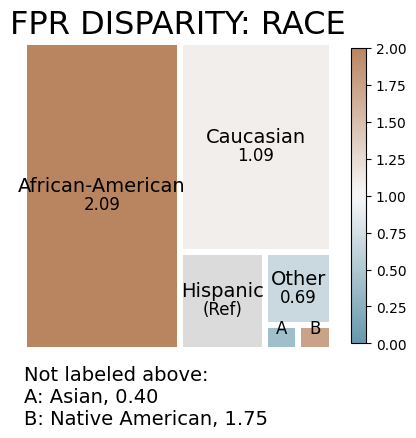

In [125]:
aqp.plot_disparity(hbdf, group_metric='fpr_disparity', attribute_name='race', significance_alpha=0.05)


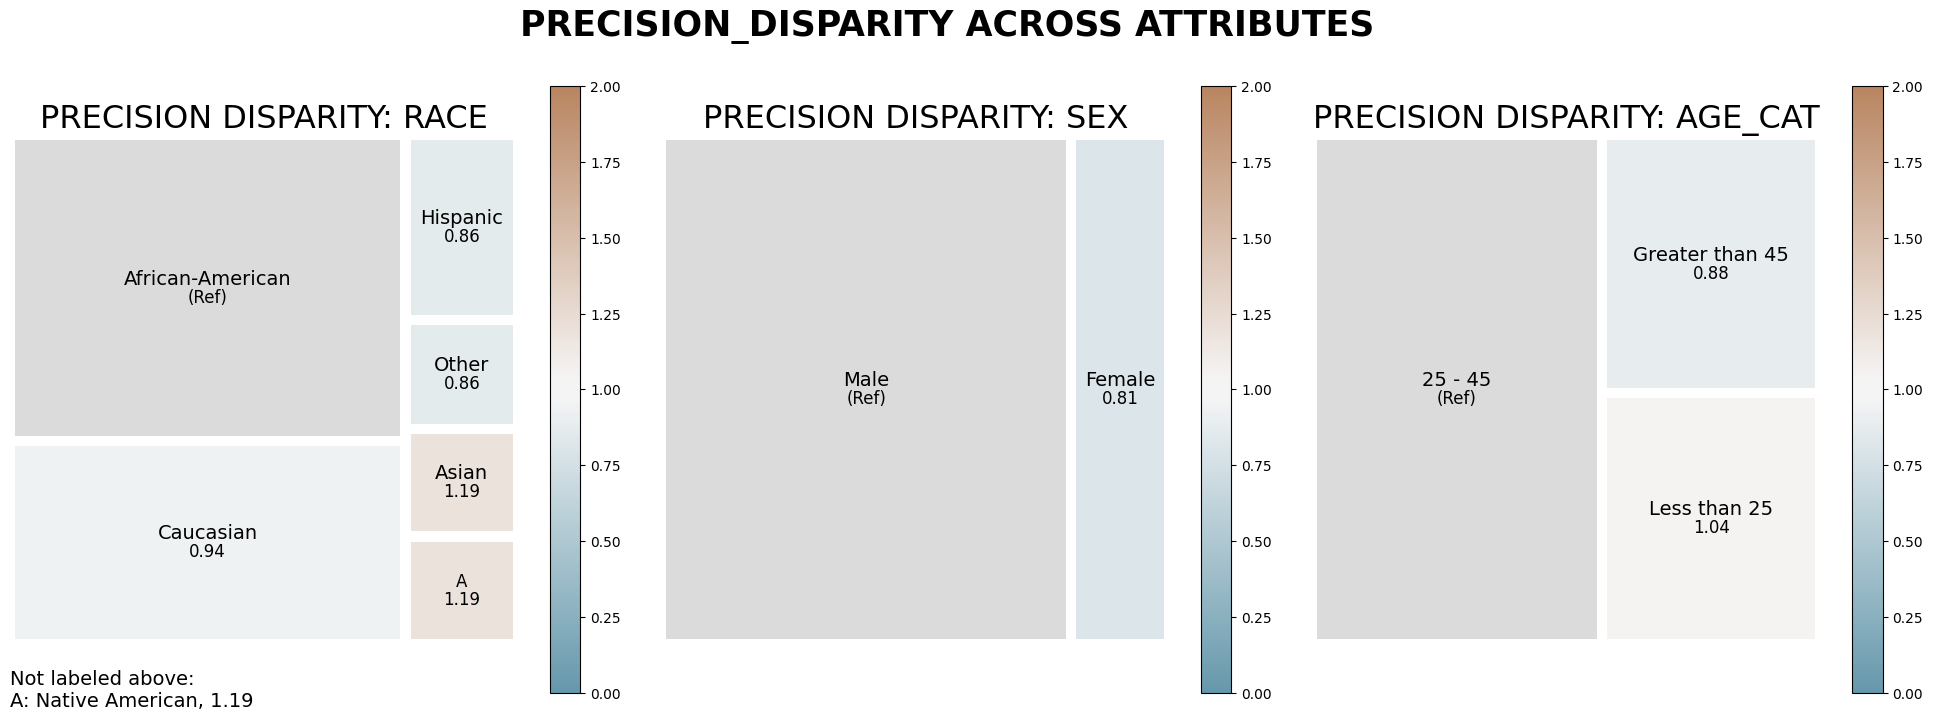

In [126]:
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)


# Group Level Fairness



We analyzed the use of the Aequitas Fairness() class in assessing fairness in machine learning predictions, focusing on the COMPAS system. We applied the get_group_value_fairness() method to bias-analyzed data, revealing disparities across different groups. In our baseline groups - Caucasian, Male, age 25-45 - the treatment appeared fair. The function helps to findd significant disparities, particularly for African-Americans who experienced higher false positives and lower false negatives compared to Caucasians. This analysis highlighted the complex trade-offs between various fairness measures and calibration in decision-making systems. Through this process, we recognized the importance of Aequitas in clarifying these trade-offs, aiding in more informed decision-making for system designers.

In [127]:
f = Fairness()
fdf = f.get_group_value_fairness(bdf)

In [129]:
parity_detrminations = f.list_parities(fdf)
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style


,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,Unsupervised Fairness,TypeII Parity,NPV Parity,TPR Parity,FPR Parity,TNR Parity,FDR Parity,Precision Parity,Supervised Fairness,TypeI Parity,FNR Parity,Impact Parity,Equalized Odds,FOR Parity,Statistical Parity
0,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,0.655412,0.588203,0.514340,2.545667,1.690224,1.064904,0.906085,1.213154,1.912093,0.586416,1.377549,0.720526,0.913728,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False
1,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,0.002412,0.250000,0.281250,0.009368,0.718384,1.268317,0.611748,0.433839,0.370749,0.698482,1.275248,1.192808,1.229148,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
2,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,0.257462,0.348003,0.393643,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,0.057281,0.298273,0.364207,0.222482,0.857099,0.916748,1.120464,1.001616,0.915887,1.165140,0.849249,1.025773,0.999346,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False
4,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,0.003618,0.666667,0.555556,0.014052,1.915691,1.268317,0.611748,0.578453,1.598854,0.209544,1.721584,0.816506,1.170618,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
5,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,0.023817,0.209549,0.352785,0.092506,0.602147,0.920466,1.115085,1.048203,0.629057,1.417970,0.618447,1.113660,0.980490,False,False,True,False,False,True,True,True,False,False,False,False,False,True,False
6,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,0.178173,0.423656,0.356989,0.216801,0.904348,0.806925,1.336425,0.734738,0.990343,1.055810,0.967101,1.004633,1.130710,False,False,True,True,True,True,False,True,False,False,True,True,True,False,False
7,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,0.821827,0.468465,0.473105,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,age_cat,25 - 45,0.626257,0.666216,0.323112,0.385135,0.333784,0.373743,0.676888,0.614865,0.580042,0.468240,0.459723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9,age_cat,Greater than 45,0.427711,0.832096,0.241117,0.459391,0.167904,0.572289,0.758883,0.540609,0.118782,0.250000,0.315990,0.204782,0.533914,0.879232,1.192804,0.746232,0.503031,1.531238,0.682963,1.248989,1.121136,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False


## Fairness is only confirmed (green) for three specific groups: those aged between 25 and 45, males, and Caucasian individuals (Reference groups for the model). For other groups not falling into these categories, the model does not achieve Statistical Parity.

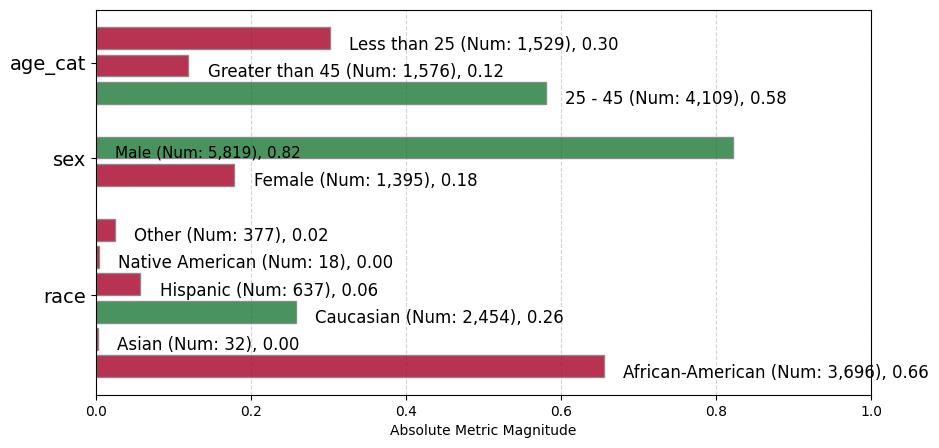

In [130]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')


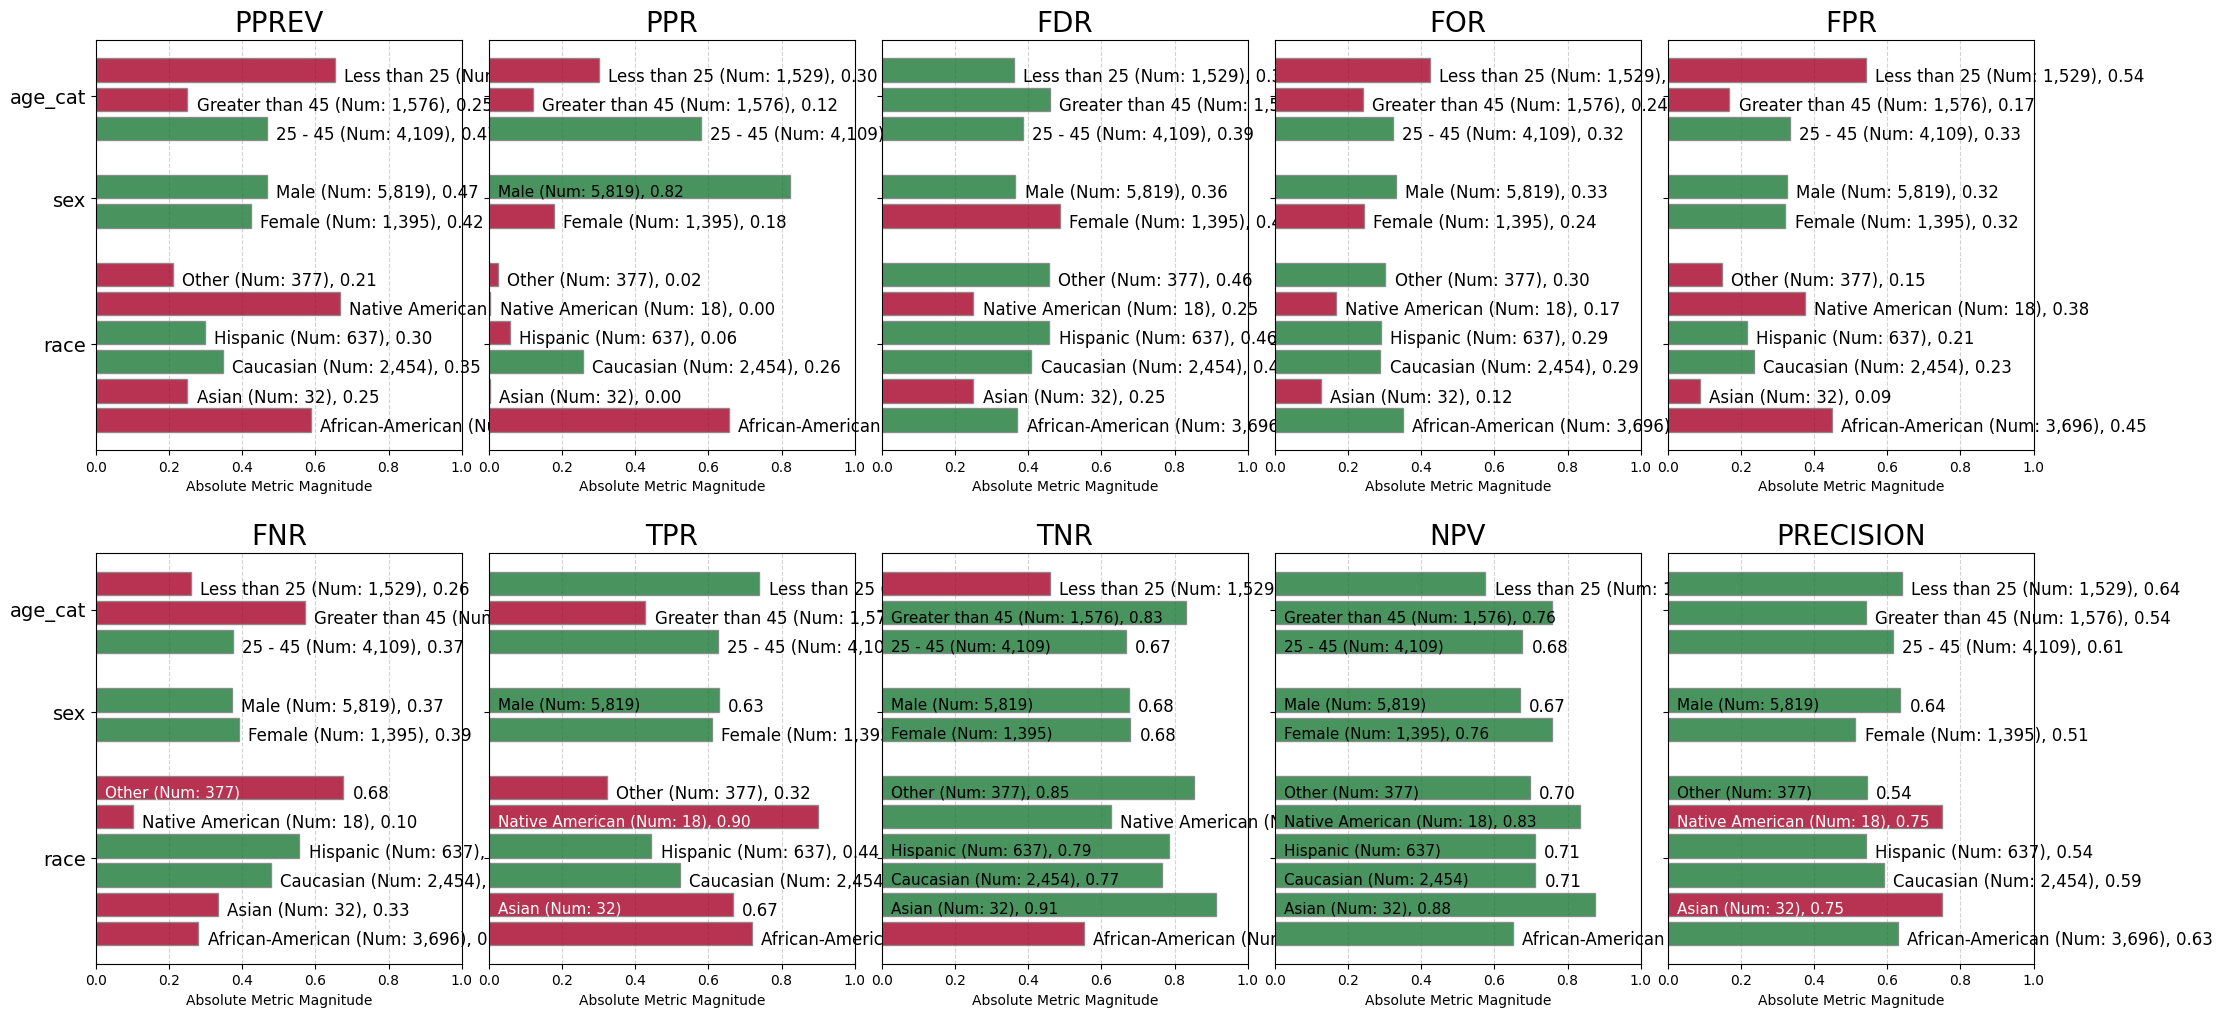

<Figure size 640x480 with 0 Axes>

In [135]:
fg = aqp.plot_fairness_group_all(fdf, ncols=5, metrics = "all")
fg.figure.savefig('fairness_group_all.png', bbox_inches='tight')

# Visualize bias metric parity?


(The disparity ratio is 1). Relative to the base groups, the COMPAS predictions only provide supervised fairness to one group, Hispanic. The treemaps present disparities across race attribute groups, using 'Caucasian' as the predefined reference group for all 10 disparity metrics. Each treemap is color-coded to reflect fairness determinations, with green indicating 'True' and red indicating 'False'. The size and position of squares in these treemaps are consistent across all metrics, based on group size. This consistent layout allows for easy comparison of fairness across different race groups for each calculated disparity metric.

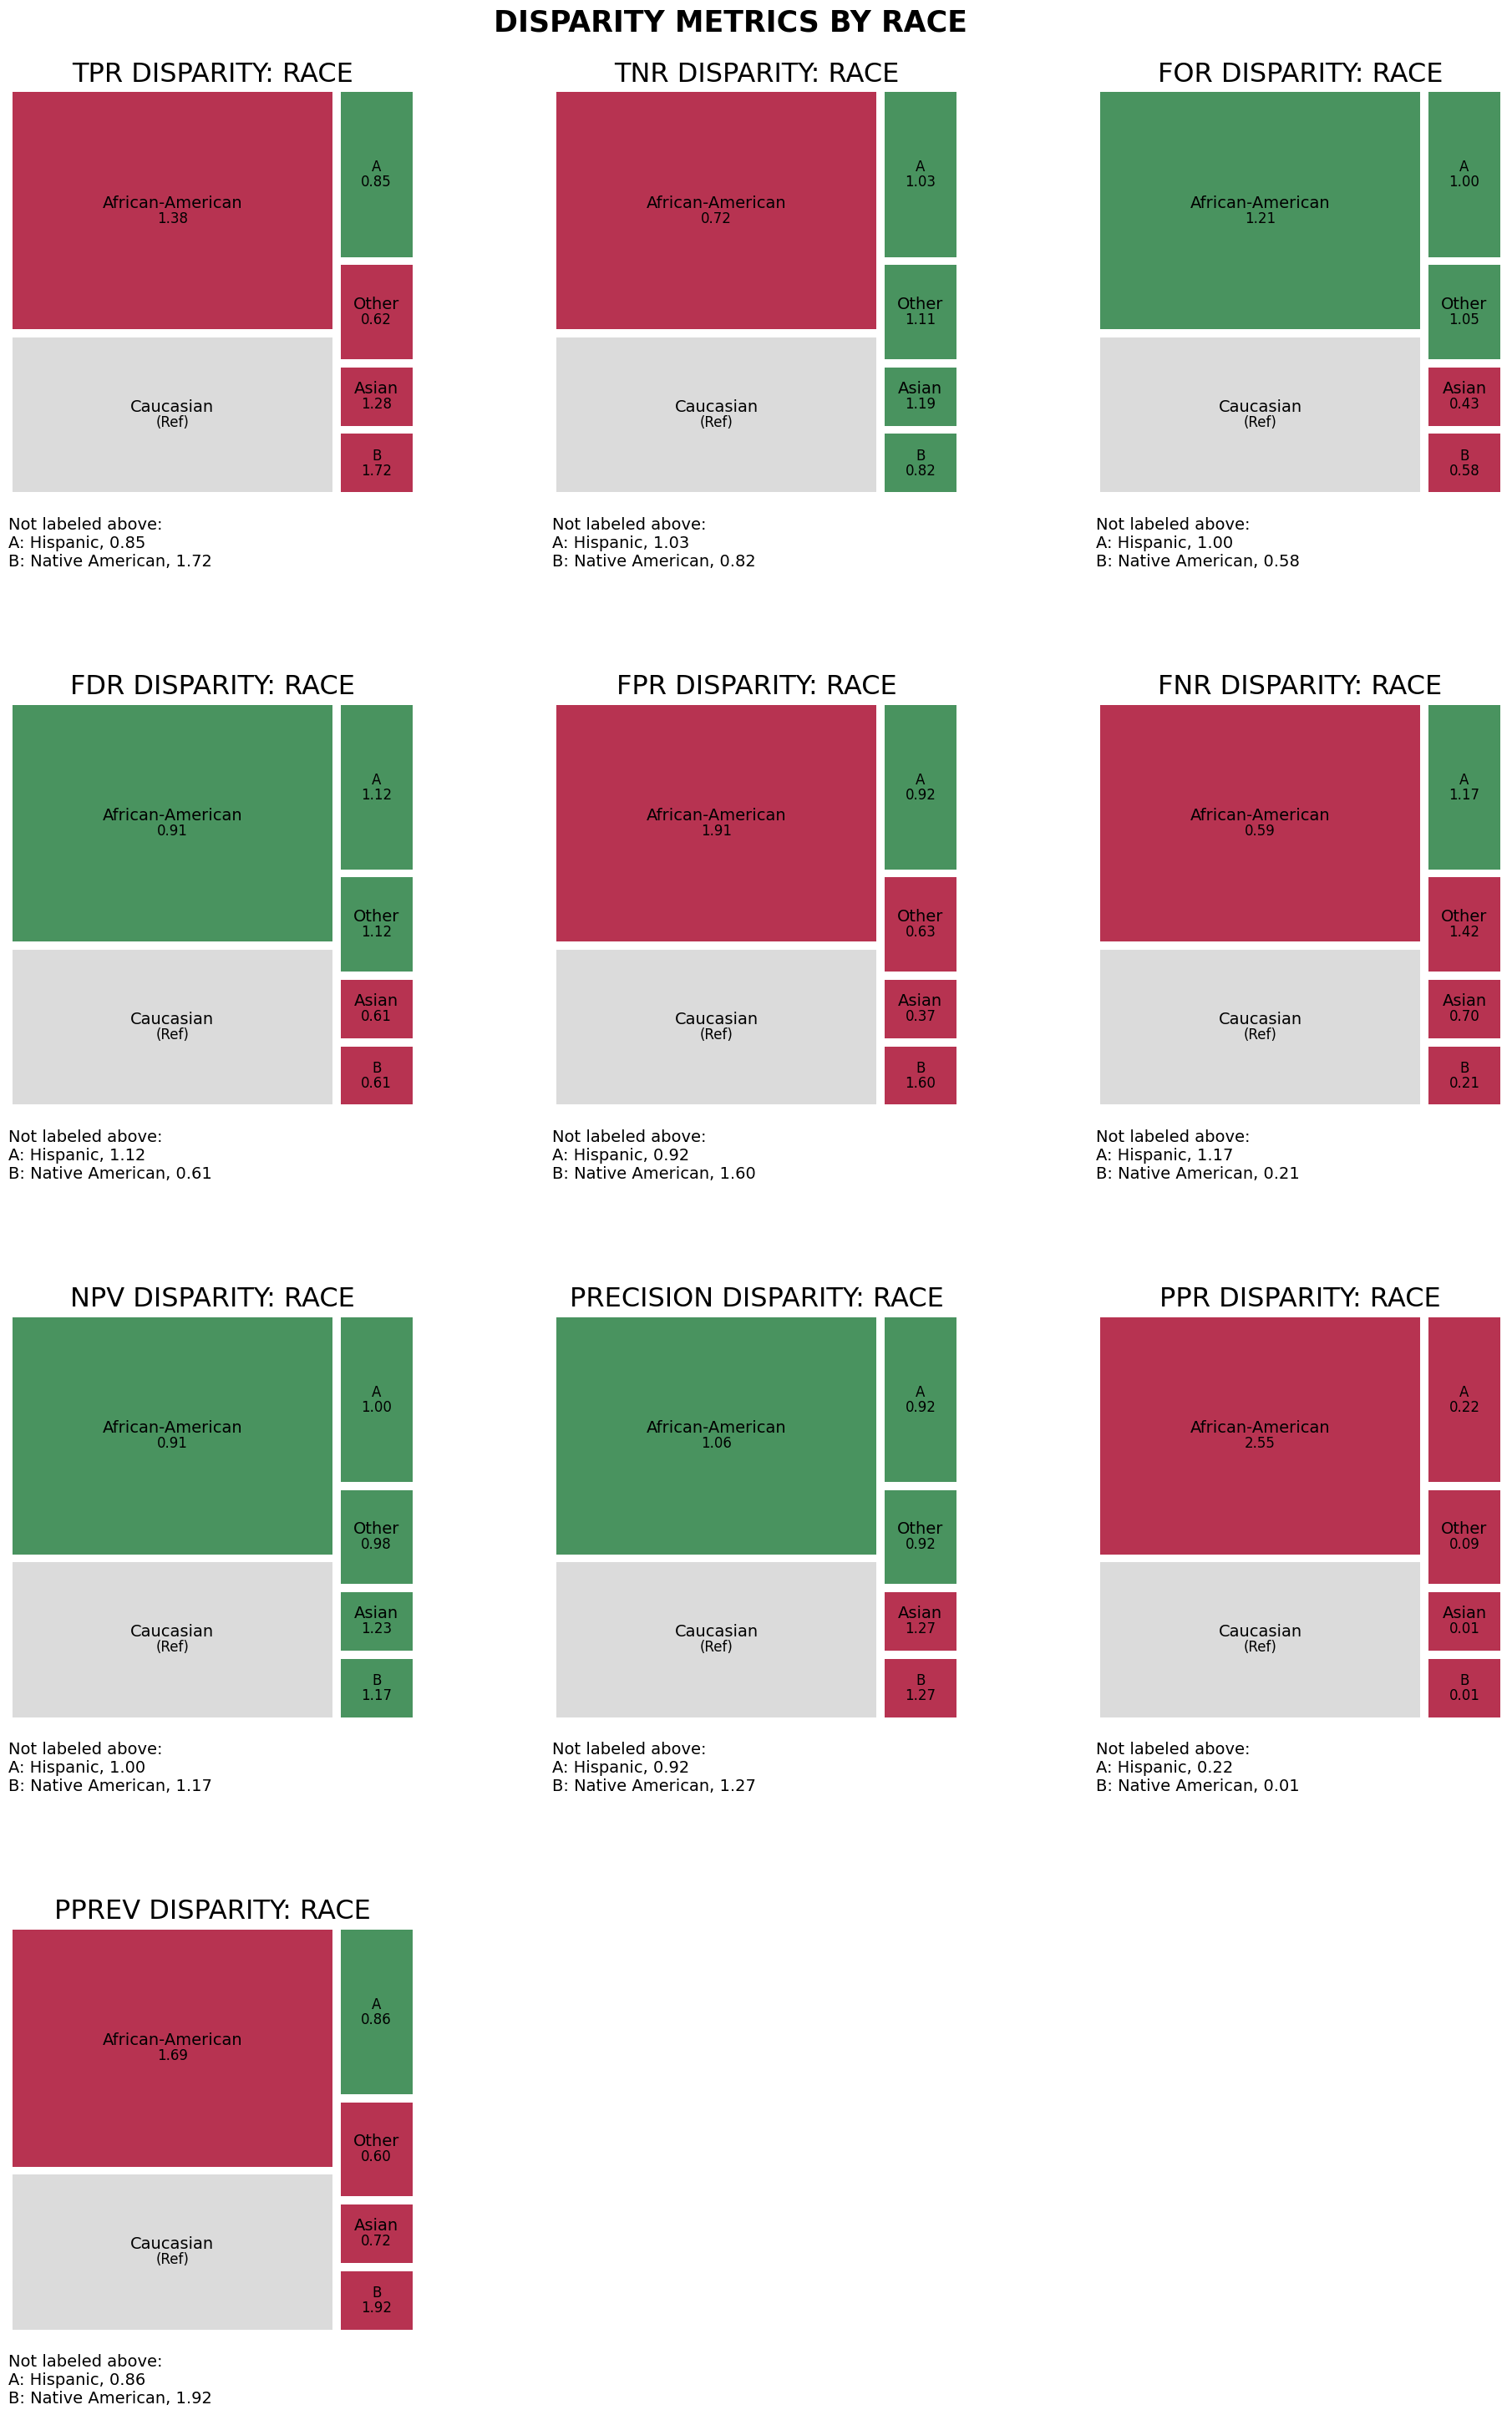

In [134]:
a_tm = aqp.plot_fairness_disparity_all(fdf, attributes=['race'], metrics='all',
                                       significance_alpha=0.05)

#save plot

a_tm.figure.savefig('fairness_disparity_all.png', bbox_inches='tight')